<a href="https://colab.research.google.com/github/bluesunx1004/2024test/blob/main/10%EC%A3%BC%EC%B0%A8%EB%AF%B8%EC%85%98(%EC%9C%A4%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

최근 치솟는 물가에 대한 뉴스를 보고, 소비자 물가 지수를 연도별, 품목별로 비교하여 물가지수 변화를 조사해 보고자 함.

1. 문제 정의

가. 소비자 물가가 얼마나 증가하고 있을까?

나. 품목별로 소비가 물가가 얼마나 증가하고 있을까?

2. 데이터 수집

국가통계포털-'연도별 품목 성질별 소비자물가지수" 검색

In [ ]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum #나눔폰트 코랩에 설치하기
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,375 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [ ]:
# 라이브러리 불러오기 : 판다스, 맷플롯립, 넘파이
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('품목별_소비자물가지수.csv', encoding='cp949')
df

,시도별,품목별,2019,2020,2021,2022,2023
0,전국,총지수,99.47,100,102.50,107.72,111.59
1,전국,(농산물)곡물,101.17,100,109.15,98.86,99.34
2,전국,(농산물)채소,86.83,100,104.25,110.27,115.58
3,전국,(농산물)과실,96.38,100,111.25,118.17,129.54
4,전국,축산물,93.18,100,112.65,119.45,116.87
...,...,...,...,...,...,...,...
284,제주특별자치도,화장품,99.24,100,102.09,110.93,115.08
285,제주특별자치도,전기 · 가스 · 수도,99.39,100,99.36,109.42,130.28
286,제주특별자치도,집세,100.39,100,100.01,101.01,101.88
287,제주특별자치도,공공서비스,100.00,100,100.71,101.81,103.01


In [ ]:
# 데이터의 기초 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     289 non-null    object 
 1   품목별     289 non-null    object 
 2   2019    289 non-null    float64
 3   2020    289 non-null    int64  
 4   2021    289 non-null    float64
 5   2022    289 non-null    float64
 6   2023    289 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ KB


In [ ]:
# 데이터의 통계량(개수, 평균, 표준편차, 최소값, 4분위수, 최대값 파악)
df.describe()

,2019,2020,2021,2022,2023
count,289.000000,289.0,289.000000,289.000000,289.000000
mean,98.700727,100.0,103.848443,109.346817,113.128478
std,4.384635,0.0,5.048568,9.932433,9.421081
min,84.900000,100.0,96.270000,96.320000,97.260000
25%,98.350000,100.0,100.470000,103.060000,105.560000
50%,99.380000,100.0,101.980000,107.960000,111.910000
75%,100.770000,100.0,105.290000,110.830000,117.550000
max,108.760000,100.0,116.470000,144.540000,136.750000


<문제 살펴보기>

가. 소비자 물가가 얼마나 증가하고 있을까?

In [ ]:
# 연도별 소비자 물가지수 추이 선 그래프로 그려보기
# 1) 0번행에 있는 총지수를 2019년~2023년까지 추출하기

y1 = df.iloc[0,2:7]
y1

2019     99.47
2020       100
2021     102.5
2022    107.72
2023    111.59
Name: 0, dtype: object

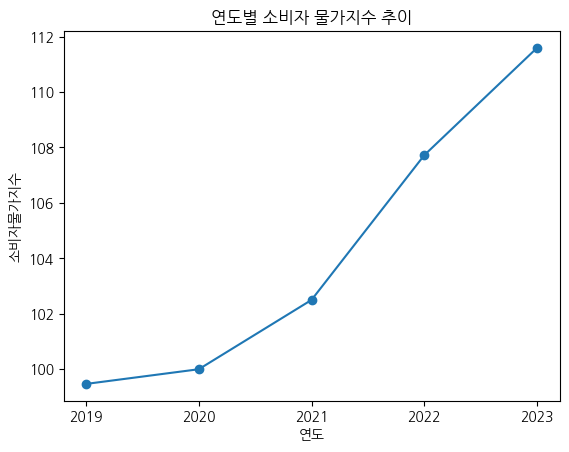

In [ ]:
# 2) 위에서 구한 2019~2023년 총지수를 선 그래프로 그려보기
plt.title('연도별 소비자 물가지수 추이')
plt.rc('font', family='NanumGothic')
plt.plot(y1.index,y1.values, marker='o')
plt.xlabel('연도')
plt.ylabel('소비자물가지수')
plt.show()

[결과분석]

1) 2019년부터 2023년까지는 그래프를 보면 알 수 있듯이
지속적으로 소비자물가지수가 상승하고 있음을 파악할 수 있음.

2) 21-22 구간이 다른 구간에 비해 유독 급격한 상승세를 보임.

  - 2022년의 소비자물가지수 상승률은 2022년 기준외환위기 이후 최고였음

  - 우크라이나 전쟁이 2022년 2월 24일에 시작되었는데 이것이 소비자물가지수 상승에 영향을 준 것으로 보임.
  전쟁의 발발로 원재료 값이 상승했고, 그에 따라 물가가
전방위적으로 크게 뛰게 된 것으로 보임. 특히 공업원료인
석유류가 전년대비 22.2%나 상승하게 되고, 전기 가스 수도가
12.6% 상승한 것이 이를 증명해 줌.


<문제 살펴보기>

나. 품목별로 소비자 물가가 얼마나 증가하고 있을까?

In [ ]:
# 품목별, 연도별 물가지수 추이 살펴보기
# 전국의 품목별 데이터 선택 선 그래프로 그려보기
y2 = df.iloc[1:17,1:7]
y3 = y2.set_index('품목별')
y3

,2019,2020,2021,2022,2023
품목별,,,,,
(농산물)곡물,101.17,100,109.15,98.86,99.34
(농산물)채소,86.83,100,104.25,110.27,115.58
(농산물)과실,96.38,100,111.25,118.17,129.54
축산물,93.18,100,112.65,119.45,116.87
수산물,93.94,100,101.44,104.93,110.56
가공식품,98.64,100,102.08,110.02,117.55
내구재,99.76,100,100.00,103.06,105.96
섬유제품,99.30,100,100.42,103.61,110.55
출판물,100.88,100,100.49,103.09,105.56


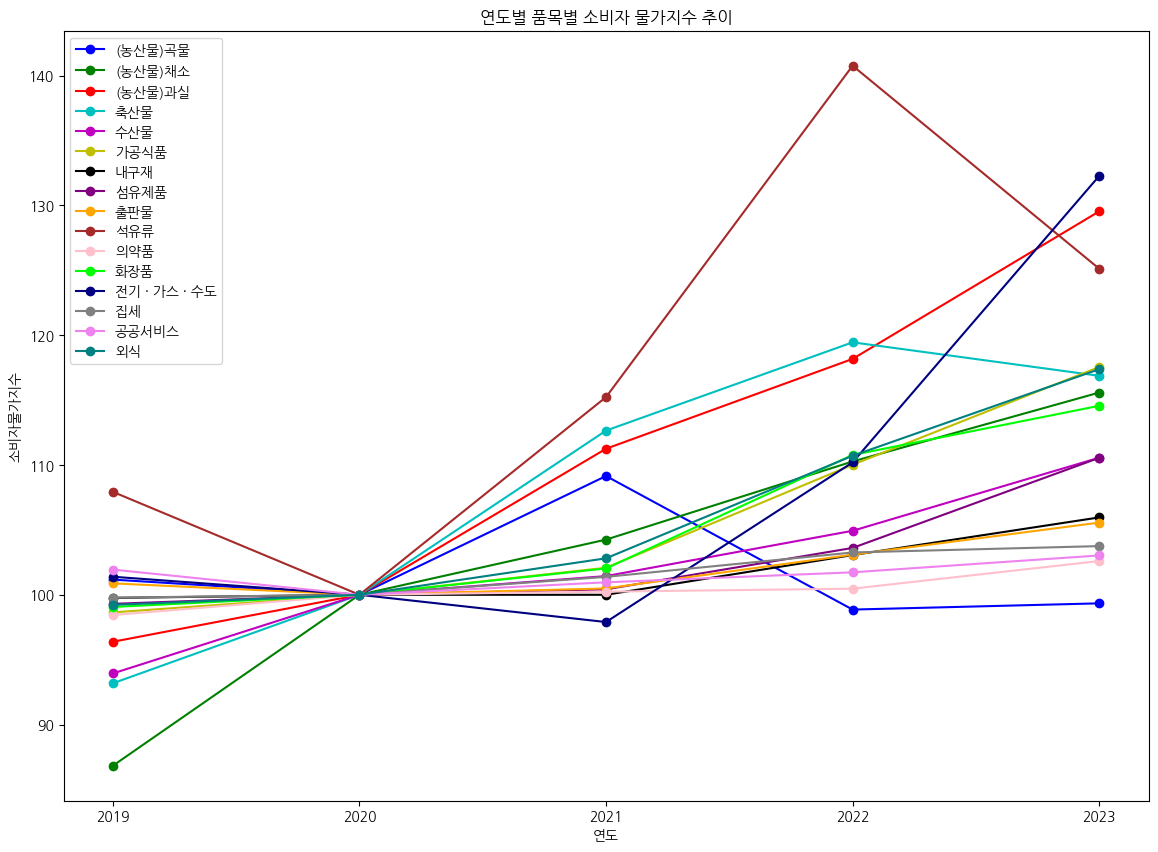

In [ ]:
from cycler import cycler

# 사용할 색상을 정의합니다.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'brown', 'pink', 'lime', 'navy', 'gray', 'violet', 'teal']

# 색상을 순환할 수 있도록 설정합니다.
plt.rc('axes', prop_cycle=cycler('color', colors))

# 그래프 설정
plt.figure(figsize=(14,10))
plt.title('연도별 품목별 소비자 물가지수 추이')
plt.rc('font', family='NanumGothic')

# 각 품목에 대해 선 그래프를 그립니다.
for column in y3.index:
    plt.plot(y3.columns, y3.loc[column], marker='o', label=column)

plt.xlabel('연도')
plt.ylabel('소비자물가지수')
plt.legend(loc='upper left')
plt.show()

[결과 분석]

1) 석유류는 2021년, 2022년에 거쳐 크게 소비자물가지수가 상승했고, 2023년에 약간 감소한 모습을 보임.
  - 2021년에 가격이 상승한 이유는 코로나19 수습 이후, 전년에 비해 안정세가 찾아오면서 석유제품의 수요가 증가하였으나, 그 당시 주요국가들의
정제설비가동률이 코로나로 인해 떨어져 국제유가와 연동되어 국제가격이
상승하면서 수급이 빠듯해지는 이중고를 겪으며 가격이 올라간 것으로 보임.
또한 코로나 시기 이후 다시 경기가 부양되면서 원자재 가격이 오른 것 역시
이에 기여했다고 볼 수 있음.

  - 2022년에 급격히 석유류의 소비자 물가지수가 오른 이유는 위에서 언급했듯이
우크라이나 전쟁이라는 국제 전쟁으로 인한 원재료 물가 상승으로 공업재료인
석유류가 특히 크게 영향을 받은 것으로 보임.

  - 2023년에는 전쟁이 끝나지는 않았지만 정점을 찍고 내려가면서 다시 기존
수준으로 소비자물가지수가 돌아온 것으로 보임.

2) 곡물의 소비자물가지수를 살펴보면 19, 20, 22, 23년에는 별 차이가 없이 비슷하나 2021년에 유독 높았음을 알 수 있음

  - 코로나19 발생 후 글로벌 경기회복에 따른 수요 증가와
주요 생산국의 수출규제 등으로 곡물 및 원자재 가격이
급등함. 이에 따라 곡물의 가격이 오른 것으로
보임.

  - 우리나라는 전세계에서 곡물을 가장 많이 수입하는
나라 중 하나인데 이상기후에 따른 공급량 감소,
중국의 곡물 수요 증가로 인해 국제곡물의 가격이
올라갔는데, 우리나라 역시 이에 영향을 받은 것으로
보임.
